In [27]:
# Import libraries and functions:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Import our own implementations
import importlib, gradient_descent, OLS, prepare_data, polynomial_features, Ridge
importlib.reload(gradient_descent)
importlib.reload(OLS)
importlib.reload(prepare_data)
importlib.reload(polynomial_features)
importlib.reload(Ridge)

from prepare_data import prepare_data
from polynomial_features import polynomial_features
from gradient_descent import gradient_descent_OLS, gradient_descent_Ridge
from OLS import OLS_parameters
from Ridge import Ridge_parameters

## Testing Gradient Descent function, OLS (fixed learning rate)

In [28]:
# Test gradient descent method, OLS:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 6

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = gradient_descent_OLS(X_train_s, y_train, eta=1e-2, num_iters=100000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)
tol=1e-3
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")


GD parameters:  [-0.03168638 -1.36139032  0.11498378  2.25529286 -0.0870312  -1.13494625]
Number of iterations: 100000
Closed-form OLS coefficients:  [-0.03069995 -1.39034676  0.11477294  2.32838004 -0.08787759 -1.18087448]
GD parameters equal to closed-form parameters: [ True False  True False  True False].
Tolerance = 0.001


## Calculating parameters with gradient descent, fixed learning rate, OLS

In [29]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Initialize variables, lists:
deg_max = 15
MSE_closed_form = []
MSE_gradient_descent = []
R2_score_closed_form=[]
R2_score_gradient_descent = []
num_iterations = []
eta = 1e-2

# Loop over degrees
for p in range(1, deg_max+1):
    
    # Make feature matrices, scale
    X_plot = polynomial_features(x, p, intercept=False)
    X_train = polynomial_features(x_train, p, intercept=False)
    X_test  = polynomial_features(x_test, p, intercept=False)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s  = scaler.transform(X_test)
    X_plot_s  = scaler.transform(X_plot)
    
    # Compute parameters with gradient descent and analytical solutions
    beta_closed = OLS_parameters(X_train_s, y_train)
    beta_gd, t = gradient_descent_OLS(X_train_s, y_train, eta = eta, num_iters=100000)
    num_iterations.append(t)
    # Compute y_offset
    y_offset = np.mean(y_train)
    # Add to predictions
    y_pred_closed = X_test_s @ beta_closed + y_offset
    y_pred_gd = X_test_s @ beta_gd + y_offset
    
    # Append MSEs
    MSE_closed_form.append(mean_squared_error(y_test, y_pred_closed))
    MSE_gradient_descent.append(mean_squared_error(y_test, y_pred_gd))
    
    # Append R2 scores
    R2_score_closed_form.append(r2_score(y_true=y_test, y_pred = y_pred_closed))
    R2_score_gradient_descent.append(r2_score(y_true=y_test, y_pred = y_pred_gd))



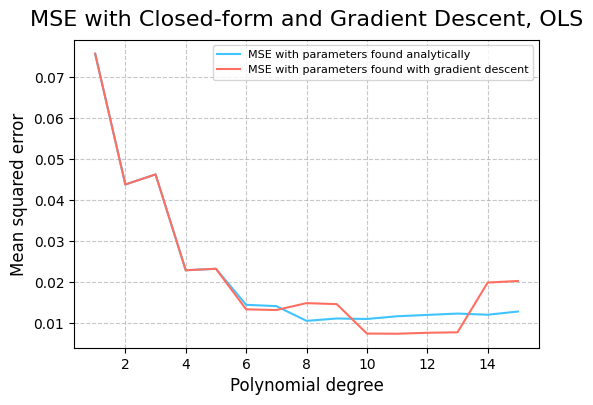

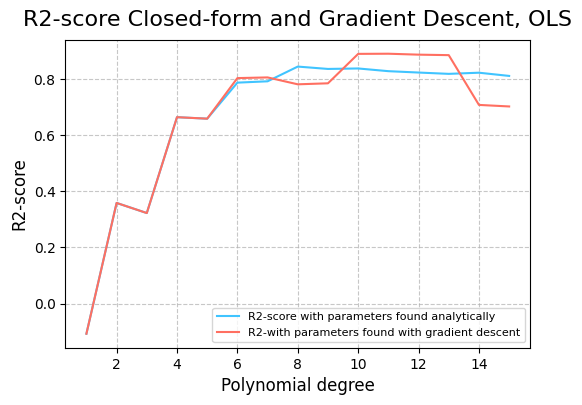

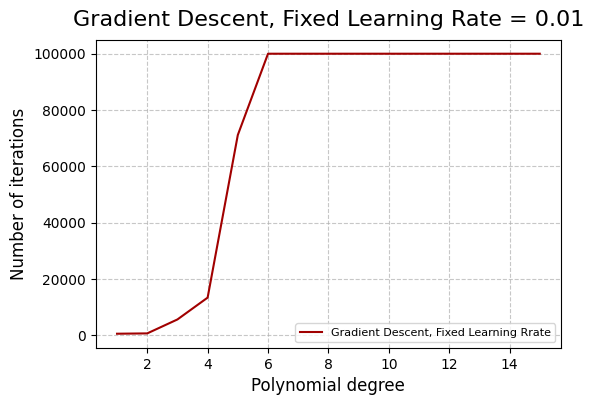

In [30]:
### Plotting results
degrees = np.arange(1, deg_max+1)

plt.figure()
plt.plot(degrees, MSE_closed_form, label="MSE with parameters found analytically", color='#40C4FF', linewidth=1.5)
plt.plot(degrees, MSE_gradient_descent, label="MSE with parameters found with gradient descent", color='#FF6F61', linewidth=1.5)
plt.title("MSE with Closed-form and Gradient Descent, OLS", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Mean squared error", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/mse_closed_form_and_gradient_descent.pdf", bbox_inches="tight")
plt.show()

plt.plot(degrees, R2_score_closed_form, label="R2-score with parameters found analytically", color='#40C4FF', linewidth=1.5)
plt.plot(degrees, R2_score_gradient_descent, label="R2-with parameters found with gradient descent", color='#FF6F61', linewidth=1.5)
plt.title("R2-score Closed-form and Gradient Descent, OLS", fontsize=16, fontfamily='sans-serif', pad=10)
plt.legend(fontsize=8)
plt.ylabel("R2-score", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/r2_closed_form_and_gradient_descent.pdf", bbox_inches="tight")
plt.show()

plt.plot(degrees, num_iterations, label="Gradient Descent, Fixed Learning Rrate", color='#A10000', linewidth=1.5)
plt.title(f"Gradient Descent, Fixed Learning Rate = {eta}", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Number of iterations", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/number_of_iterations_gradient_descent.pdf", bbox_inches="tight")
plt.show()

## Testing gradient descent function (fixed learning rate), Ridge

In [31]:
# Test gradient descent method, OLS:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 6
lam = 0.09

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = gradient_descent_Ridge(X_train_s, y_train, lam = lam, eta=1e-2, num_iters=100000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = Ridge_parameters(X_train_s, y_train, lam)
print("Closed-form Ridge coefficients: ", beta_closed)
tol=1e-3
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.03571739 -1.01968993  0.0951752   1.40430949 -0.06177101 -0.60441474]
Number of iterations: 100000
Closed-form Ridge coefficients:  [-0.03565442 -1.02153979  0.09516187  1.40897862 -0.06182518 -0.60734884]
GD parameters equal to closed-form parameters: [ True  True  True False  True False].
Tolerance = 0.001


In [ ]:
"""
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data()

p = 12
MSE_ridge=[]
R2_score_ridge= []
lambdas=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0, 0.1, 1, 10]
#print(lambdas)
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)
for l in lambdas:
    beta = gradient_descent_Ridge(X_train_s, y_train, eta=0.01, lam=l, num_iters=10000)
    y_pred = X_test_s @ beta
    MSE_ridge.append(mean_squared_error(y_test, y_pred))
    R2_score_ridge.append(r2_score(y_true=y_test, y_pred=y_pred))
    
    plt.plot(x, X_plot_s@beta + np.mean(y), label=f"lambda={l}")
    
plt.title(f"Polynomial degree = {p}")
plt.plot(x, y, label="runges")
plt.legend()    
plt.show()
"""


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
"""
# Teste uten loop:
p = 5
l=0.1
X_plot = polynomial_features(x, p, intercept=True)
X_train = polynomial_features(x_train, p, intercept=True)
X_test  = polynomial_features(x_test, p, intercept=True)
scaler = StandardScaler()
scaler.fit(X_train[:, 1:])

X_train_s = np.hstack([X_train[:, [0]], scaler.transform(X_train[:, 1:])])
X_test_s  = np.hstack([X_test[:,  [0]], scaler.transform(X_test[:,  1:])])
X_plot_s  = np.hstack([X_plot[:,  [0]], scaler.transform(X_plot[:,  1:])])

beta=gradient_descent_Ridge(X_train_s, y_train, eta=0.1, lam=l)
print(beta)
y_pred=X_test_s@beta

print(beta.shape, X_test_s.shape)
print(y_pred)
"""


'\n# Teste uten loop:\np = 5\nl=0.1\nX_plot = polynomial_features(x, p, intercept=True)\nX_train = polynomial_features(x_train, p, intercept=True)\nX_test  = polynomial_features(x_test, p, intercept=True)\nscaler = StandardScaler()\nscaler.fit(X_train[:, 1:])\n\nX_train_s = np.hstack([X_train[:, [0]], scaler.transform(X_train[:, 1:])])\nX_test_s  = np.hstack([X_test[:,  [0]], scaler.transform(X_test[:,  1:])])\nX_plot_s  = np.hstack([X_plot[:,  [0]], scaler.transform(X_plot[:,  1:])])\n\nbeta=gradient_descent_Ridge(X_train_s, y_train, eta=0.1, lam=l)\nprint(beta)\ny_pred=X_test_s@beta\n\nprint(beta.shape, X_test_s.shape)\nprint(y_pred)\n'